In [ ]:
%load_ext autoreload
%autoreload 2


import default_config
import matplotlib.pyplot as plt
import numpy as np
import torch
from datasets.utils import load

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


INFO: # - Found file at data/expt12_times_timestep1000000.txt! Loading...
INFO: # - Found file at data/expt12_place_cells_timestep1000000.npy! Loading...
INFO: # - Found file at data/expt12_labels_timestep1000000.txt! Loading...


      Unnamed: 0         times      angles  velocities  gains
0              0  2.628457e+09  262.050059   20.774875  1.000
1              1  2.629457e+09  284.430866   23.129644  1.000
2              2  2.630457e+09  297.791522    0.117727  1.000
3              3  2.631457e+09  300.892952    9.356827  1.000
4              4  2.632457e+09  312.661618    9.433864  1.000
...          ...           ...         ...         ...    ...
2977        2977  5.605457e+09  172.001363   -0.048780  0.231
2978        2978  5.606457e+09  171.975660   -0.001114  0.231
2979        2979  5.607457e+09  171.947144   -0.041444  0.231
2980        2980  5.608457e+09  171.935113   -0.000451  0.231
2981        2981  5.609457e+09  171.924801   -0.046826  0.231

[2982 rows x 5 columns]
Dataset shape: (1984, 11).


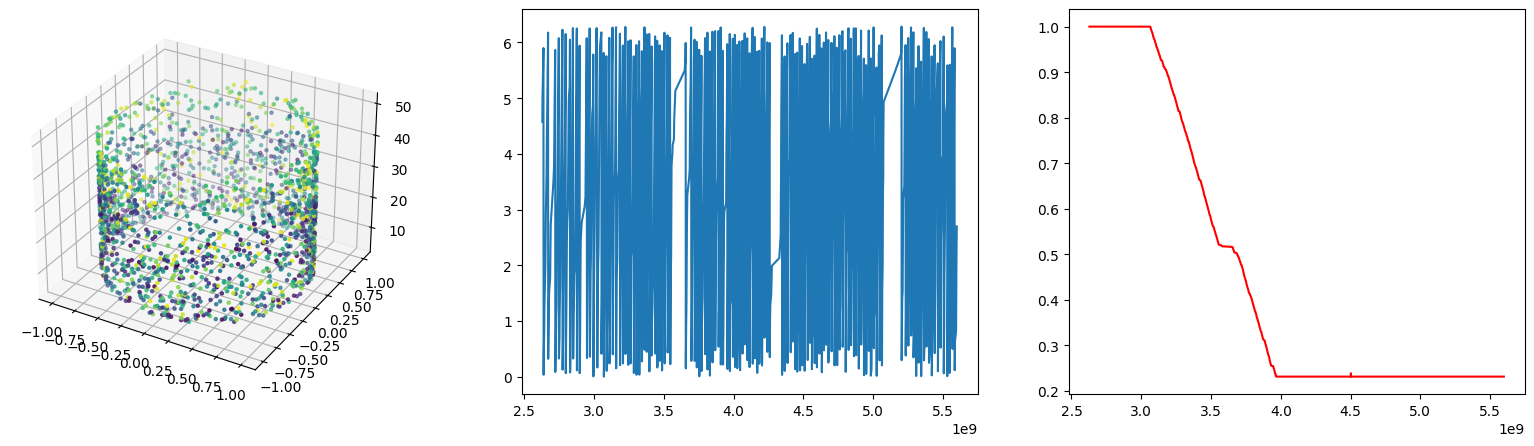

In [ ]:
dataset_torch, labels, train_loader, test_loader = load(default_config)
thetas = np.array(labels["angles"])
sort = np.argsort(thetas)
sorted_thetas = thetas[sort]
dataset = dataset_torch.detach().numpy()
sorted_dataset = dataset[sort, :]

times = labels["times"]
velocities = labels["velocities"]
gains = labels["gains"]
angles = np.radians(labels["angles"])
x = np.cos(angles)
y = np.sin(angles)

fig = plt.figure(figsize=(20, 5))

cyl = fig.add_subplot(1, 3, 1, projection="3d")

cyl.scatter3D(x, y, velocities, s=5, c=times)

prof = fig.add_subplot(1, 3, 2)

gain = fig.add_subplot(1, 3, 3)

prof.plot(times, angles)

gain.plot(times, gains, color="red")

/tmp/ipykernel_1068213/40621587.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.plot3D(x[0:T], y[0:T], velocities[0:T])
/tmp/ipykernel_1068213/40621587.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.scatter3D(x[0:T], y[0:T], velocities[0:T], c = times[0:T])


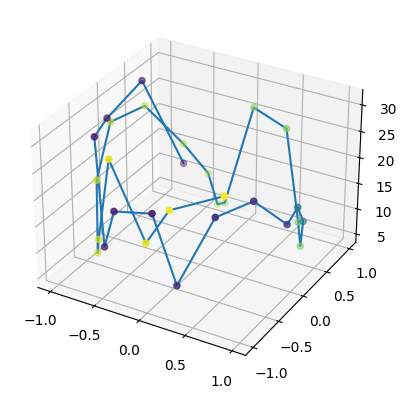

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")

T = 30

ax.plot3D(x[0:T], y[0:T], velocities[0:T])
ax.scatter3D(x[0:T], y[0:T], velocities[0:T], c=times[0:T])

# ax.plot3D(x, y, velocities)
# ax.scatter3D(x, y, velocities, c = times)

In [ ]:
dataset_torch.shape

torch.Size([1984, 11])

In [ ]:
filename = "/home/facosta/code/neuralgeom/neuralgeom/results/trained_models/experimental_2022-11-22 12:14:00_model.pt"

model = torch.load(filename)

In [ ]:
z, _, _ = model(dataset_torch.to(default_config.device))

In [ ]:
thetas = (torch.atan2(z[:, 1], z[:, 0]) + 2 * torch.pi) % (2 * torch.pi)

thetas = thetas.cpu().detach().cpu().numpy()

/tmp/ipykernel_1068213/2915880853.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(times[t1:t2],angles[t1:t2])
/tmp/ipykernel_1068213/2915880853.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(times[t1:t2],thetas[t1:t2])


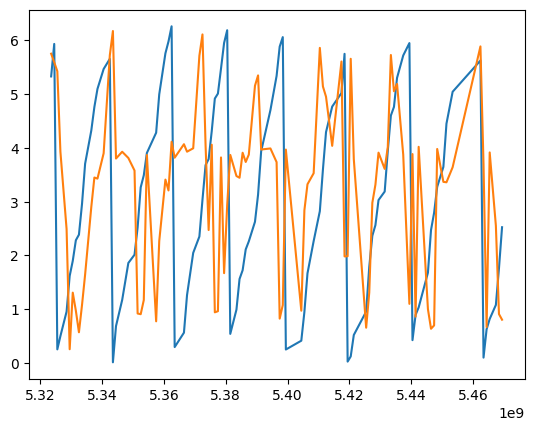

In [ ]:
t1 = 1800
t2 = 1900
plt.plot(times[t1:t2], angles[t1:t2])
plt.plot(times[t1:t2], thetas[t1:t2])

/tmp/ipykernel_1068213/1082551104.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax_true.plot3D(x[t1:t2],y[t1:t2],velocities[t1:t2])
/tmp/ipykernel_1068213/1082551104.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax_h.plot3D(np.cos(thetas)[t1:t2], np.sin(thetas)[t1:t2],velocities[t1:t2])
/tmp/ipykernel_1068213/1082551104.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-ba

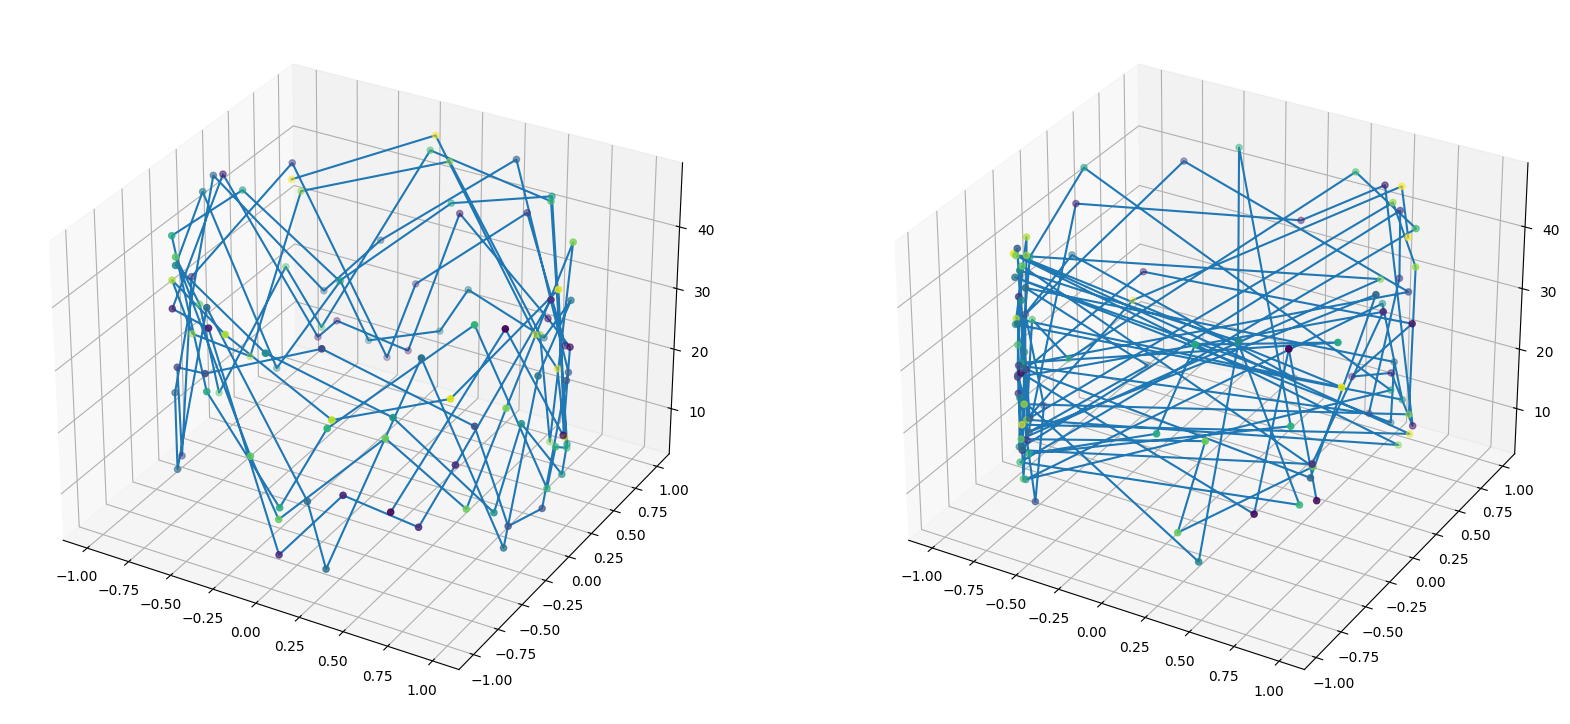

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax_true = fig.add_subplot(121, projection="3d")

ax_h = fig.add_subplot(122, projection="3d")


ax_true.plot3D(x[t1:t2], y[t1:t2], velocities[t1:t2])

ax_h.plot3D(np.cos(thetas)[t1:t2], np.sin(thetas)[t1:t2], velocities[t1:t2])

ax_true.scatter3D(x[t1:t2], y[t1:t2], velocities[t1:t2], c=times[t1:t2])

ax_h.scatter3D(
    np.cos(thetas)[t1:t2], np.sin(thetas)[t1:t2], velocities[t1:t2], c=times[t1:t2]
)

In [ ]:
a = np.cumsum(angles)
th = np.cumsum(thetas)

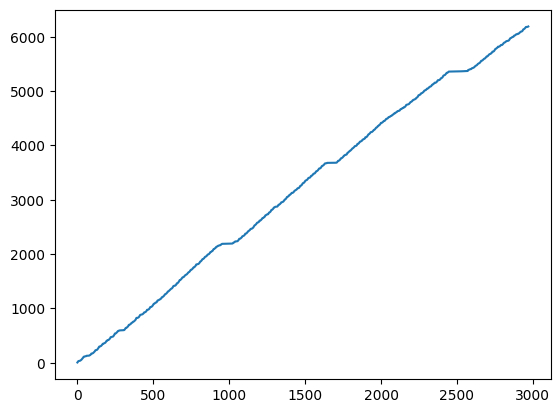

In [ ]:
plt.plot(a)

In [ ]:
plt.plot(velocities)

NameError: name 'plt' is not defined

In [ ]:
a